In [12]:
import pandas as pd

# Assuming the file is in the same directory
df = pd.read_csv('ford.csv')

# Display the first few rows
df.head()



,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [13]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Replace missing values with mean value of the column
for column in columns_with_missing_values:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Delete duplicate entries from the data frame
df.drop_duplicates(inplace=True)


In [15]:
# Check the data types of all columns
print(df.dtypes)


model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [16]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()


In [26]:
import pandas as pd

# Sample DataFrame creation for illustration (remove this if you already have df)
# df = pd.read_csv('path_to_your_file.csv')

# Display the initial columns and types
print("Initial DataFrame columns and types:")
print(df.dtypes)

# Drop columns that are not useful for numeric correlation
df_dropped = df.drop(columns=['model', 'transmission', 'fuelType'])

# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df_dropped, drop_first=True)

# Display the columns after encoding
print("Columns after encoding:")
print(df_encoded.columns)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Print the correlation matrix to verify
print("Correlation matrix:")
print(correlation_matrix)

# Define the target variable
target_variable = 'price'

# Check if the target variable is included in the encoded DataFrame
if target_variable not in df_encoded.columns:
    raise ValueError(f"Target variable '{target_variable}' must be present in the DataFrame.")

# Get the correlations with the target variable
correlations_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)

# Exclude the target variable itself
correlations_with_target = correlations_with_target.drop(target_variable)

# Get the top 5 attributes with the highest correlation with the target variable
top_5_attributes = correlations_with_target.head(5)

print("Top 5 attributes with highest correlation with the target:")
print(top_5_attributes)


Initial DataFrame columns and types:
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object
Columns after encoding:
Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')
Correlation matrix:
                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.635715 -0.708690  0.297183 -0.021702   -0.137582
price       0.635715  1.000000 -0.530483  0.405969 -0.346263    0.411451
mileage    -0.708690 -0.530483  1.000000 -0.257543  0.117697    0.214692
tax         0.297183  0.405969 -0.257543  1.000000 -0.502343    0.185358
mpg        -0.021702 -0.346263  0.117697 -0.502343  1.000000   -0.262239
engineSize -0.137582  0.411451  0.214692  0.185358 -0.262239    1.000000
Top 5 attributes with highest correlation with the target:
year          0.635715
mileage       0.

In [28]:
# Count the number of entries with each unique value of the specific attribute
value_counts = df['fuelType'].value_counts()

print(value_counts)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


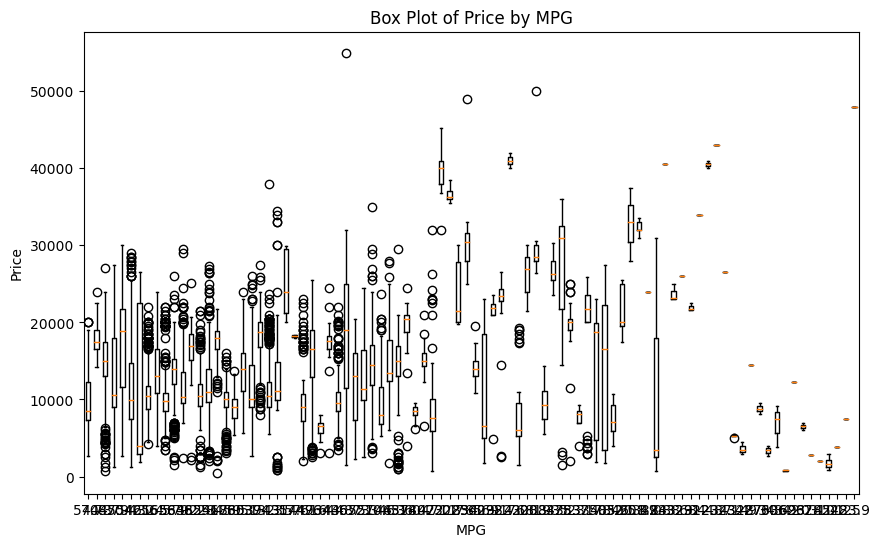

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for illustration (replace with your actual DataFrame)
# df = pd.read_csv('path_to_your_file.csv')

# Create a box plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['mpg'] == mpg]['price'] for mpg in df['mpg'].unique()], labels=df['mpg'].unique())
plt.xlabel('MPG')
plt.ylabel('Price')
plt.title('Box Plot of Price by MPG')
plt.show()


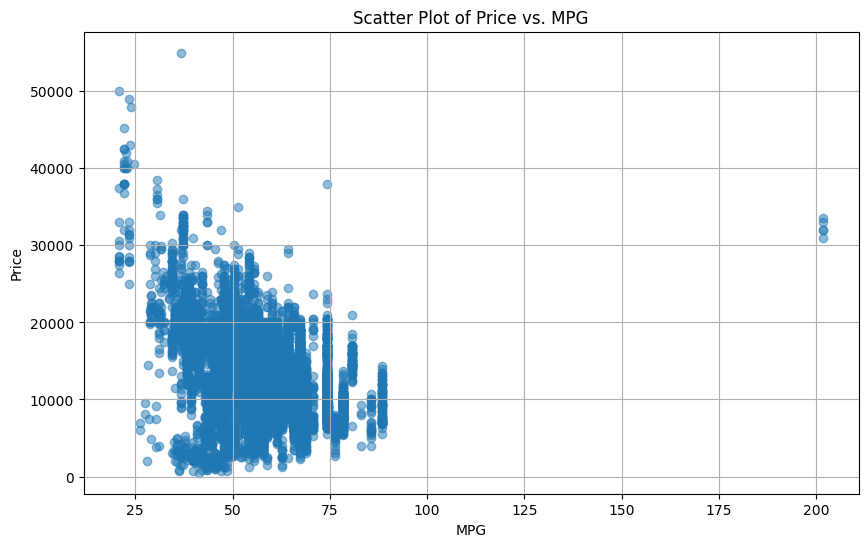

In [37]:
import matplotlib.pyplot as plt

# Sample data for illustration (replace with your actual DataFrame)
# df = pd.read_csv('path_to_your_file.csv')

plt.figure(figsize=(10, 6))
plt.scatter(df['mpg'], df['price'], alpha=0.5)
plt.xlabel('MPG')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. MPG')
plt.grid(True)
plt.show()


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have a pandas data frame called df with 'price' and 'mpg' columns

# Split the data into features (X) and target (y)
X = df[['mpg']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values
y_pred = model.predict(X_test)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error:", mse)

R^2 value: 0.1504343741072478
Mean Squared Error: 19049855.140110757


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have a pandas data frame called df with the specified features and the target 'price'

# Select the features and target
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values
y_pred = model.predict(X_test)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error:", mse)

R^2 value: 0.6917125960316439
Mean Squared Error: 6912744.82880192
